In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
import os
print(os.getcwd())  # This will print your current working directory

C:\Users\Mirko\Desktop\Data_Science\IH_Notebooks\lab-eda-univariate-Mirko


In [3]:
data = pd.read_csv('/Users/Mirko/Desktop/Data_Science/IH_Notebooks/lab-eda-univariate-Mirko/amz_uk_price_prediction_dataset.csv')
df = data.copy()

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [7]:
df["reviews"].astype(int)

0          15308
1          98099
2          15308
3           7205
4           1881
           ...  
2443646        0
2443647        0
2443648        0
2443649      404
2443650       34
Name: reviews, Length: 2443651, dtype: int64

Looking into the df we can see we have much information.
Data is divided into 9 columns.

To allow myself to also run some measurements for the reviews column I decided to cast the column as an int rather than keeping it as str.

I'm now going to proceed with creating the frequency table.

In [8]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [9]:
num.columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [10]:
cat.columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [11]:
frequency_table = cat["category"].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

The frequency table has just too much information for me to work with.
For this reason I'm going to extend this to only best sellers.

In [12]:
df_best_sellers = df.loc[(df["isBestSeller"] == True)]
df_best_sellers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2434712,2815504,B07G72RGNX,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2434953,2815751,B08F7P4374,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2435202,2816076,B07SF7Y2XM,POLYTE Plush Quick Dry Lint Free Microfibre Ba...,4.4,3779,24.99,True,0,Bathroom Linen
2440120,2822184,B0841XR4TK,PRO-SPIN Table Tennis Bat With Pro Carbon Fibr...,4.6,3781,42.99,True,100,Table Tennis


In [13]:
freq_best_sellers = df['category'].value_counts().head(5)
freq_best_sellers

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [14]:
proportion_table = df['category'].value_counts(normalize= True).head(5).round(2)
proportion_table

category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
Name: proportion, dtype: float64

In [15]:
total_absolute = freq_best_sellers.sum()
total_relative = proportion_table.sum()

In [16]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index= ['Total'])
total_row

,absolute_frequency,relative_frequency
Total,912876,0.38


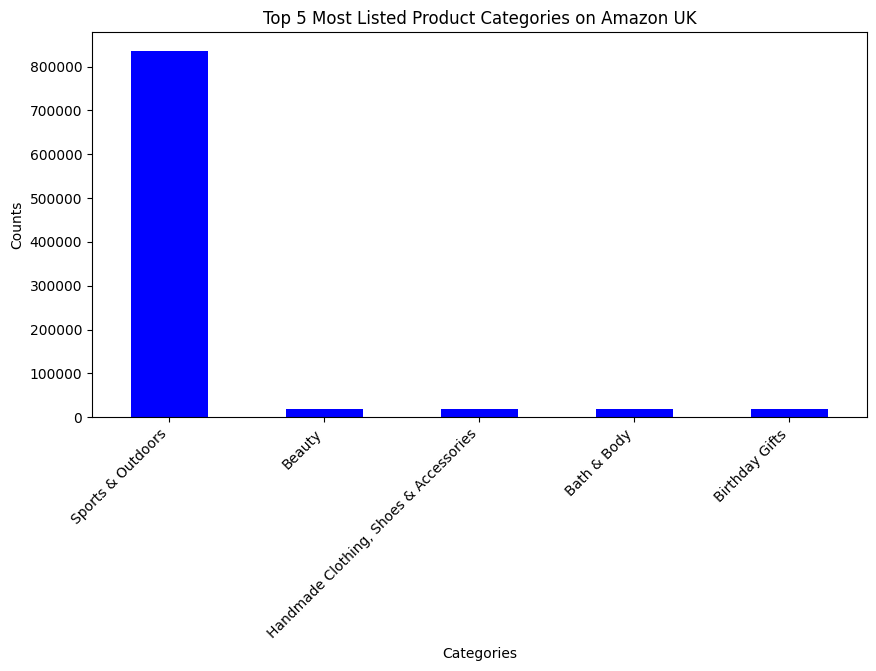

In [17]:
import matplotlib.pyplot as plt

freq_best_sellers = df['category'].value_counts().head(5)

# Creating the bar chart
plt.figure(figsize=(10, 5))
freq_best_sellers.plot(kind='bar', color='blue')

# Labels and title
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.title("Top 5 Most Listed Product Categories on Amazon UK")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


The above bar chart shows us that the category which has the highest listed count is **Sports & Outdoors**.
This is also reflected by the fact that if we group the orders by category and we calculate the proportion table for the top 5 Sports & Outdoors is going to make up to the 34% of the overall listing of AMZ.

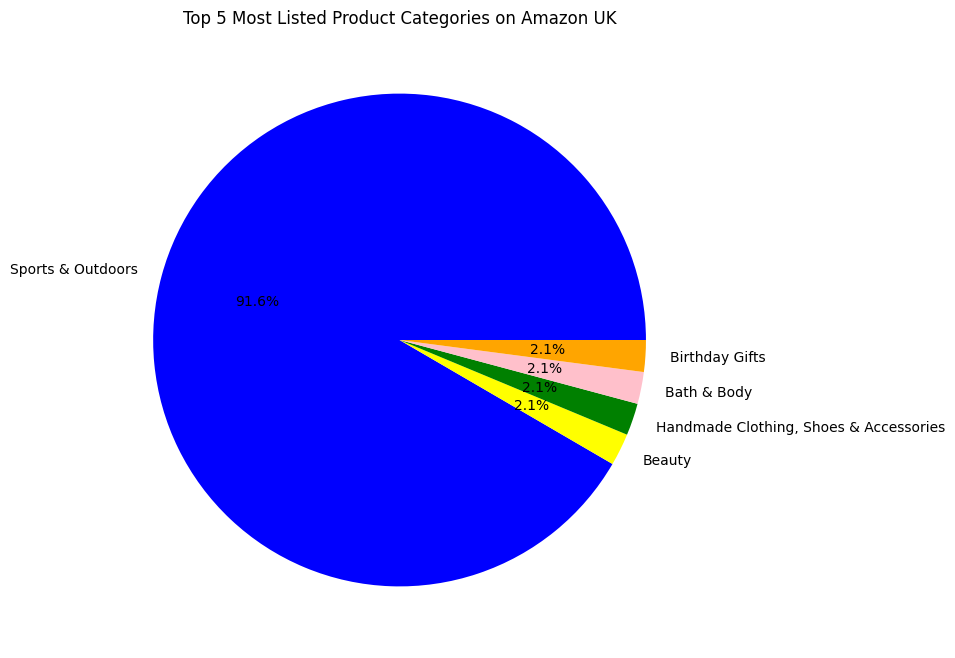

In [18]:
# Generate the frequency table dynamically
freq_best_sellers = df['category'].value_counts().head(5)

# Creating the pie chart
plt.figure(figsize=(8, 8))
freq_best_sellers.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow', 'green', 'pink', 'orange'])

# Title and display settings
plt.title("Top 5 Most Listed Product Categories on Amazon UK")
plt.ylabel('')  # Hide y-axis label for better appearance

# Show the plot
plt.show()

The pie chart shows once again the distribution of listing among these top 5 categories.
The pie chart doesn't show us more than the bar chart and therefore it's not a preferred method of data visualization.

I can now deep dive into Product Pricing analysis.

The goals for this section are the following:

- Measures of Centrality: Calculate mean, median, and mode for product prices.
- Measures of Dispersion: Compute variance, standard deviation, range, and IQR.
- Histogram: Display the distribution of product prices.
- Box Plot: Identify potential outliers in pricing.

In [19]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [20]:
mean_price = df['price'].mean()
mean_price

np.float64(89.24380943923663)

In [21]:
median_price = df['price'].median()
median_price

np.float64(19.09)

In [22]:
mode_price = df['price'].mode()
mode_price

0    9.99
Name: price, dtype: float64

After reviewing the mean price and the mode we can see that the results are the following:

- **mean_price** = 89
- **mode_price** = 10

In [23]:
std_price = df['price'].std()
std_price

np.float64(345.60886175349884)

In [24]:
var_price = df['price'].var()
var_price

np.float64(119445.48532254907)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [26]:
range_price = df['price'].max() - df['price'].min()
range_price

np.float64(100000.0)

In [27]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(36.0)

After reviewing the standard deviation, min and max price we can confirm the following:

- **max_price** = 100.000
- **min_price** = 0.0
- **std_price** = 345.6

The **variance** is quite high and it indicates that the price can be very different depending on the products.

In [28]:
!pip install seaborn

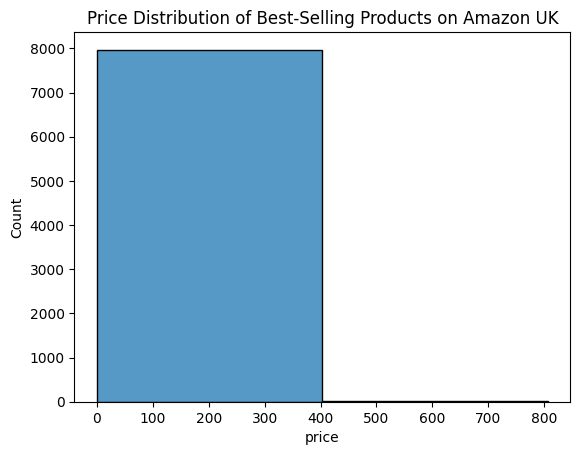

In [29]:
import seaborn as sns

sns.histplot(df_best_sellers.price, bins=2)
plt.title("Price Distribution of Best-Selling Products on Amazon UK")
plt.show()

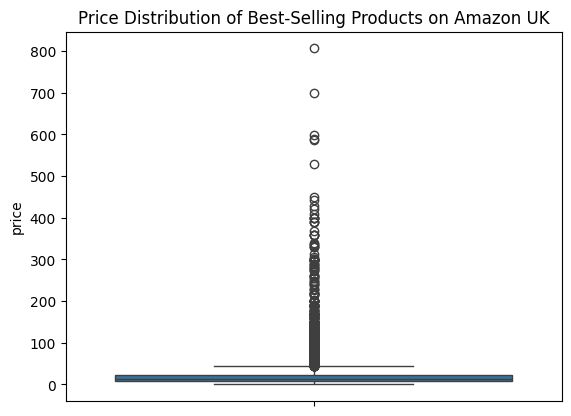

In [30]:
sns.boxplot(data=df_best_sellers.price)
plt.title("Price Distribution of Best-Selling Products on Amazon UK")
plt.show()

Looking into the boxplots it's clear that the vast majority of items offered on the Amazon website has a very similar price below to 400.
The products which are above this price are treated as **outliers**.

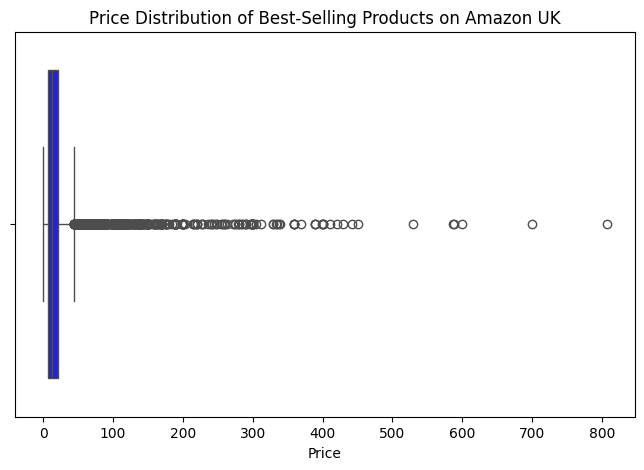

In [31]:


# Create a box plot for price distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_best_sellers, x='price', color='blue')

# Add labels and title
plt.xlabel("Price")
plt.title("Price Distribution of Best-Selling Products on Amazon UK")

# Show the plot
plt.show()

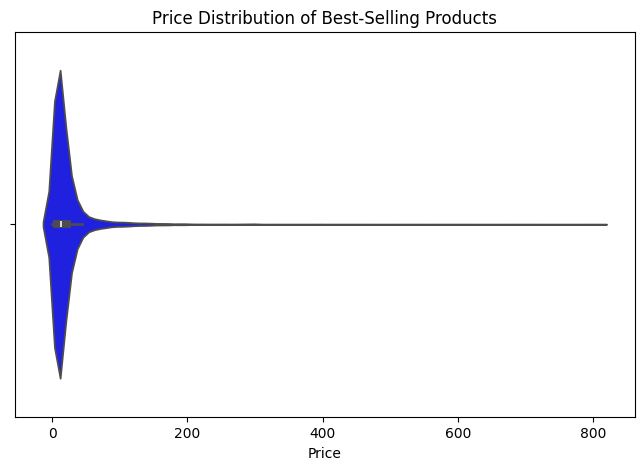

In [32]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_best_sellers, x='price', color='blue')

plt.xlabel("Price")
plt.title("Price Distribution of Best-Selling Products")

plt.show()

Considering how hard it is to read the box plots due to the presence of outliers we can implement a Violin plot to improve readability.
Once again, this confirms how the vast majority of items have a very similar price.
The dataset presents extreme outliers.

In [33]:
outliers_df = df_best_sellers[df_best_sellers['price'] > 23]
outliers_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2434712,2815504,B07G72RGNX,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2434953,2815751,B08F7P4374,TACVASEN Men's Waterproof Fleece Mountain Jack...,4.5,4928,61.99,True,0,Snowboards
2435202,2816076,B07SF7Y2XM,POLYTE Plush Quick Dry Lint Free Microfibre Ba...,4.4,3779,24.99,True,0,Bathroom Linen
2440120,2822184,B0841XR4TK,PRO-SPIN Table Tennis Bat With Pro Carbon Fibr...,4.6,3781,42.99,True,100,Table Tennis


With the code below we managed to create a df for the outliers.
If we wanted we could remove them entirely from our analysis or we could run a parallel analysis specialised on outliers.

In the next session we are going to focus on the rating of the products. Deliverables for this section are the following:

- How do customers generally rate product? Are there trends?
- var, std and IQR for the rating. Are the ratings consistent?
- skewness and jurtosis of the rating column. Are ratings normally distributed?
- Plotting the distribution of rating 

In [34]:
ratings_df = df.copy()

In [35]:
ratings_df['stars'].mean()

np.float64(2.152836472966065)

In [36]:
ratings_df['stars'].median()

np.float64(0.0)

In [37]:
ratings_df['stars'].mode()

0    0.0
Name: stars, dtype: float64

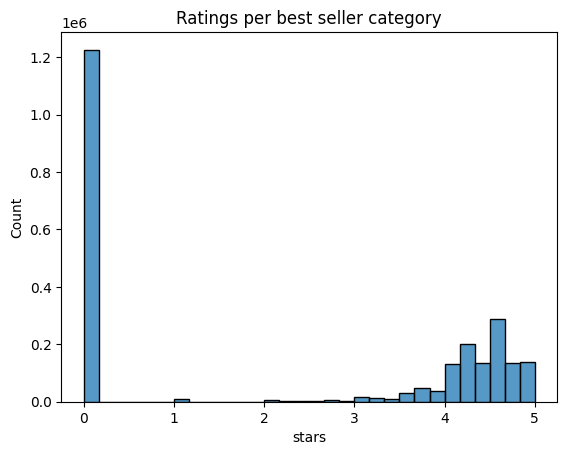

In [42]:
sns.histplot(ratings_df.stars, bins=30)
plt.title("Ratings per best seller category")
plt.show()

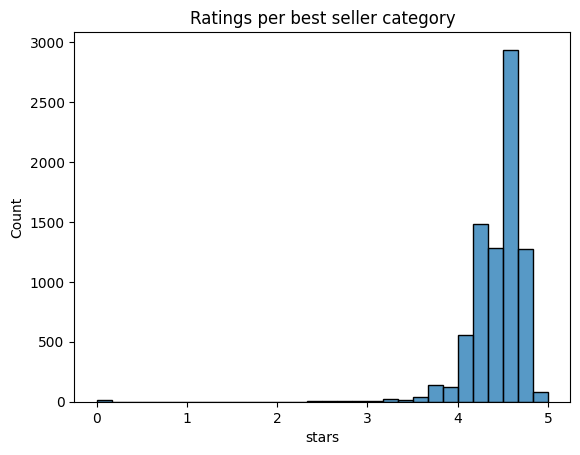

In [41]:
sns.histplot(df_best_sellers.stars, bins=30)
plt.title("Ratings per best seller category")
plt.show()

These 2 graphs offer interesting information.

The first one focuses on all of the data provided while the second one on the top listing products.

If we look at the data from an olystic point of view we see there's a good amount of outliers of rates that are 0.
The top listing categories instead perform quite well with majority of rates between 4 and 5.

The overall **mean** is 2 for the whole dataset.

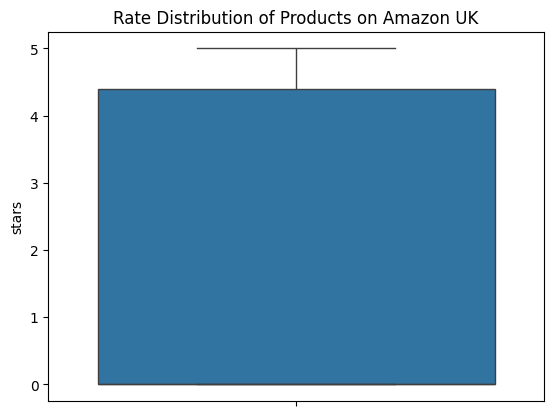

In [43]:
sns.boxplot(data=ratings_df['stars'])
plt.title("Rate Distribution of Products on Amazon UK")
plt.show()

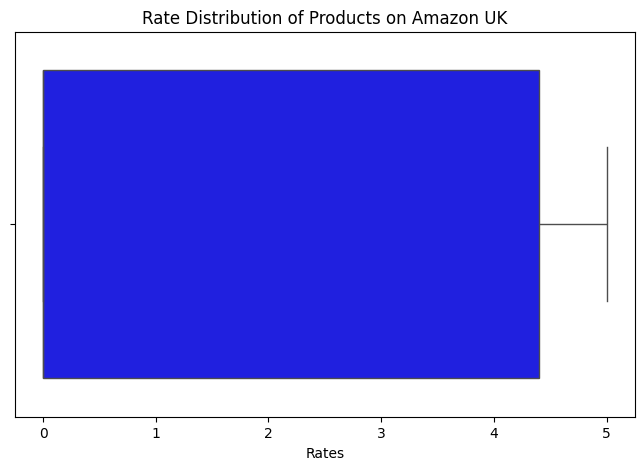

In [45]:


# Create a box plot for price distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=ratings_df, x='stars', color='blue')

# Add labels and title
plt.xlabel("Rates")
plt.title("Rate Distribution of Products on Amazon UK")

# Show the plot
plt.show()

Looking into this graph it seems clear that the vast variety of rates selected are between 0 and 4.

5 rates are more rare.

In [52]:
skewness = ratings_df["stars"].skew().round(2)

In [53]:
kurtosis = ratings_df["stars"].kurtosis().round(2)

Looking into the skeweness and the kurtosis the following is clear:

- The distribution is positively skewed
- The distribution is also platykurtic meaning that the peak is flatter, indicating fewer extreme values.

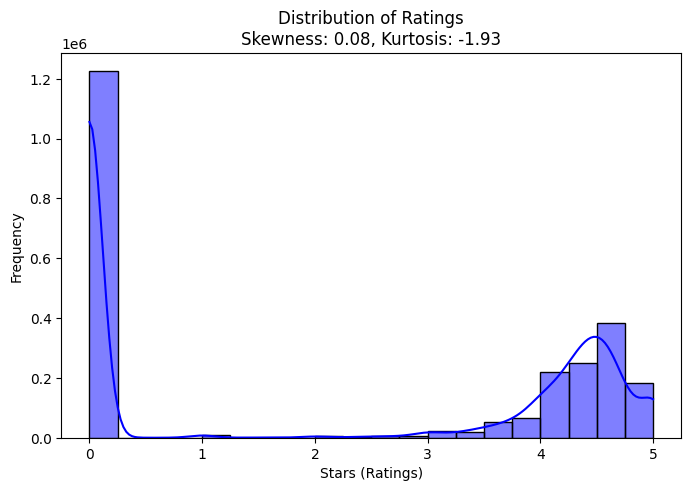

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df["stars"], bins=20, kde=True, color='blue')

plt.title(f"Distribution of Ratings\nSkewness: {skewness}, Kurtosis: {kurtosis}")

plt.xlabel("Stars (Ratings)")
plt.ylabel("Frequency")

plt.show()
